In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
import keras.layers as layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.shape

(42000, 785)

In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y=train["label"]
Y

0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [7]:
# making range 0-9
Y_train = to_categorical(train['label'], num_classes = 10)
print(Y_train[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


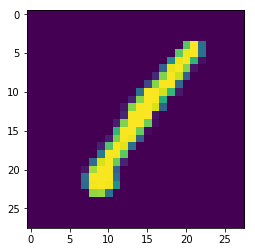

In [8]:
import matplotlib.pyplot as plt
import cv2
images = train.drop('label',axis = 1).values.reshape(-1,28,28,1) 
image = images[0]

plt.imshow(np.squeeze(image))


In [9]:
print(Y_train.shape)

(42000, 10)


In [10]:
train = pd.read_csv("train.csv")   # one row one image  (28*28) = 784
test = pd.read_csv("test.csv") 
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 
Y_train = to_categorical(Y_train, num_classes = 10)


In [11]:
X_train.isnull().count().describe()
test.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [12]:
X_train = X_train / 255    # normalizing 
test = test / 255

In [13]:
X_train = X_train.values.reshape(-1,28,28,1)   # forming 2d data from 1d
test = test.values.reshape(-1,28,28,1)


In [14]:
test.shape

(28000, 28, 28, 1)

In [15]:
# for Le-Net5 using input size of 32*32*1

X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
test = np.pad(test, ((0,0),(2,2),(2,2),(0,0)), 'constant')


In [16]:
X_train.shape

(42000, 32, 32, 1)

In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2) # spliting in train and validation set

In [18]:
X_train.shape

(37800, 32, 32, 1)

In [19]:
test.shape

(28000, 32, 32, 1)

In [20]:
# model = Sequential()


# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))


# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu',))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))



# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))


# model.add(Flatten())

# model.add(Dense(256, activation = "relu"))
# model.add(Dropout(0.5))

# model.add(Dense(10, activation = "softmax"))

In [21]:
## le-net 5

model = Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_1 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [23]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 20
batch_size = 32
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [24]:
final = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, Y_val),callbacks=[learning_rate_reduction])



Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 15s 398us/step - loss: 0.3039 - acc: 0.9078 - val_loss: 0.1159 - val_acc: 0.9660
Epoch 2/20
37800/37800 [==============================] - 8s 210us/step - loss: 0.0964 - acc: 0.9707 - val_loss: 0.0679 - val_acc: 0.9795
Epoch 3/20
37800/37800 [==============================] - 8s 207us/step - loss: 0.0647 - acc: 0.9807 - val_loss: 0.0610 - val_acc: 0.9817
Epoch 4/20
37800/37800 [==============================] - 8s 204us/step - loss: 0.0506 - acc: 0.9843 - val_loss: 0.0606 - val_acc: 0.9824
Epoch 5/20
37800/37800 [==============================] - 8s 199us/step - loss: 0.0410 - acc: 0.9876 - val_loss: 0.0639 - val_acc: 0.9800
Epoch 6/20
37800/37800 [==============================] - 8s 200us/step - loss: 0.0362 - acc: 0.9889 - val_loss: 0.0579 - val_acc: 0.9833
Epoch 7/20
37800/37800 [==============================] - 8s 199us/step - loss: 0.0319 - acc: 0.9901 - val_loss: 0.0460 - 

In [26]:
print(final.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


In [27]:
results = model.predict(test) # test contain 28000 each of 1d array of 1*10 -> probabilities of each 

In [28]:
results[0]

array([2.32640205e-21, 6.05524074e-19, 1.00000000e+00, 5.48825451e-22,
       6.24458771e-29, 3.25213072e-29, 1.94942888e-25, 1.26824495e-20,
       9.32384113e-22, 4.12718318e-22], dtype=float32)

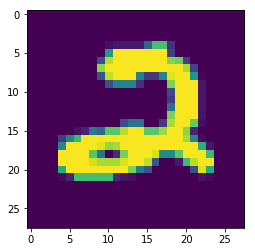

In [29]:
test1 = pd.read_csv("test.csv") 
import matplotlib.pyplot as plt
import cv2
images = test1.values.reshape(-1,28,28,1) 
image = images[0]

plt.imshow(np.squeeze(image))


In [30]:
results = np.argmax(results,axis = 1)

In [31]:
results[0]

2

In [32]:
import numpy as np
results.shape

(28000,)

In [33]:
results = pd.Series(results,name="Label")

In [34]:
len(results)

28000

In [35]:
ouput=  pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

In [36]:
ouput.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [37]:
ouput.to_csv("digit.csv",index=False)